In [ ]:
from lightning import Trainer
import torch


In [8]:
from MLPW.arc.vae import VAE
from MLPW.data.manifold import SwissRoll_DataModule

train_loader = SwissRoll_DataModule().get_train_loader()

device = torch.device("cpu")
model = VAE().to(device)
# 创建训练器并训练模型
trainer = Trainer(max_epochs=100)



GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [3]:
for batch in train_loader:
    print(batch[0].shape)
    break

torch.Size([1024, 2])


In [9]:
trainer.fit(model, train_loader)


  | Name    | Type | Params | Mode 
-----------------------------------------
0 | encoder | MLP  | 28.2 K | train
1 | decoder | MLP  | 27.9 K | train
-----------------------------------------
56.1 K    Trainable params
0         Non-trainable params
56.1 K    Total params
0.224     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 123.42it/s, v_num=2]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 121.89it/s, v_num=2]


In [10]:
model.to('cpu')

VAE(
  (encoder): MLP(
    (layers): Sequential(
      (0): Linear(in_features=2, out_features=164, bias=True)
      (1): ReLU()
      (2): Linear(in_features=164, out_features=164, bias=True)
      (3): ReLU()
      (4): Linear(in_features=164, out_features=4, bias=True)
    )
  )
  (decoder): MLP(
    (layers): Sequential(
      (0): Linear(in_features=2, out_features=164, bias=True)
      (1): ReLU()
      (2): Linear(in_features=164, out_features=164, bias=True)
      (3): ReLU()
      (4): Linear(in_features=164, out_features=2, bias=True)
    )
  )
)

In [11]:
z= torch.randn(1024, 2)
x_hat = model.decoder(z)


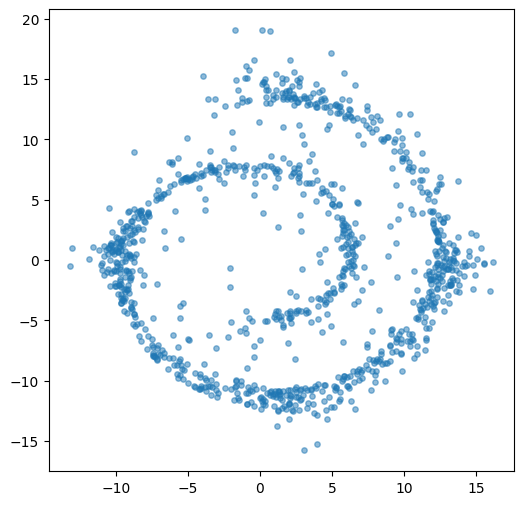

In [12]:
import matplotlib.pyplot as plt
x_hat = x_hat.detach().numpy()
plt.figure(figsize=[6, 6])
plt.scatter(x_hat[:, 0],x_hat[:, 1],s=15,alpha=0.5)
plt.show()
plt.close()